Load data fromkeras.datasets and perform following computational analysis:- [CO3]

(a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Gated Recurrent Units (GRU) Model

(d) Training the GRU Model

(e) Text Generation Using the Trained Model

(f) Evaluate Model’s accuracy

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb

# (a) Preprocessing of the Data
vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# (c) Build the Gated Recurrent Units (GRU) Model
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GRU(128, return_sequences=False))  # Can use return_sequences=True for text generation
model.add(Dense(1, activation='sigmoid'))

# (d) Training the GRU Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=5, batch_size=128,
                    validation_split=0.2, callbacks=[early_stopping])

# (f) Evaluate Model’s accuracy
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# (e) Text Generation Using the Trained Model - Example (simple, placeholder)
# Not a fully trained language model but a simple way to generate sequences
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        # Convert seed text into integers
        tokenized_input = pad_sequences([seed_text], maxlen=maxlen, truncating='pre')
        # Predict the next word
        predicted = model.predict(tokenized_input)
        # Assuming binary sentiment (0 or 1), just output sentiment as a placeholder
        print(f'Predicted sentiment score for next word: {predicted[0][0]}')

# Example seed input (using the first training example)
generate_text(x_train[0], next_words=5)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 121s 752ms/step - accuracy: 0.6236 - loss: 0.6443 - val_accuracy: 0.8208 - val_loss: 0.4068
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 141s 747ms/step - accuracy: 0.8599 - loss: 0.3261 - val_accuracy: 0.8350 - val_loss: 0.4051
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 729ms/step - accuracy: 0.9075 - loss: 0.2386 - val_accuracy: 0.8628 - val_loss: 0.3341
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 121s 770ms/step - accuracy: 0.9417 - loss: 0.1615 - val_accuracy: 0.8588 - val_loss: 0.3591
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 117s 747ms/step - accuracy: 0.9632 - loss: 0.1085 - val_accuracy: 0.8520 - val_loss: 0.3999
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.8509 - loss: 0.4153
Test Loss: 0.4084167182445526
Test Accuracy: 0.8518000245094299
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Predicted sentiment score for next word: 0.9880729913711548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted sentim

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 371ms/step - accuracy: 0.6737 - loss: 0.5825 - val_accuracy: 0.8372 - val_loss: 0.3790
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 349ms/step - accuracy: 0.8908 - loss: 0.2759 - val_accuracy: 0.8442 - val_loss: 0.3539
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 349ms/step - accuracy: 0.9245 - loss: 0.1967 - val_accuracy: 0.8380 - val_loss: 0.4163
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 357ms/step - accuracy: 0.9521 - loss: 0.1345 - val_accuracy: 0.8356 - val_loss: 0.4476
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 353ms/step - accuracy: 0.9724 - loss: 0.0883 - val_accuracy: 0.8320 - val_loss: 0.5553
LSTM Model Accuracy: 0.8299
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 62s 383ms/step - accuracy: 0.6478 - loss: 0.5952 - val_accuracy: 0.8410 - val_loss: 0.3591
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 377ms/step - accuracy: 0.8907 - loss: 0.2694 - val_accuracy: 0.8416 - val_loss: 0.4012
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 377ms/step - accuracy: 0.9250

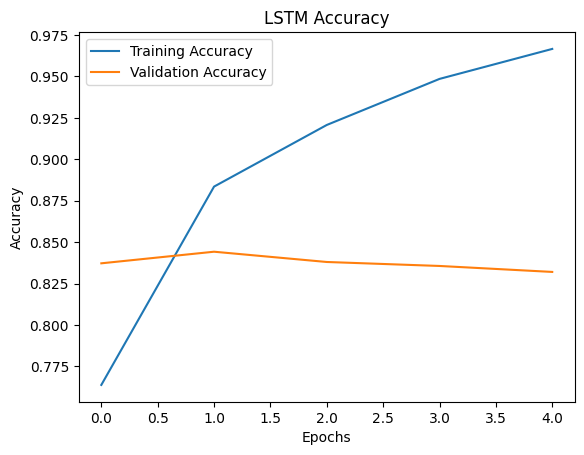

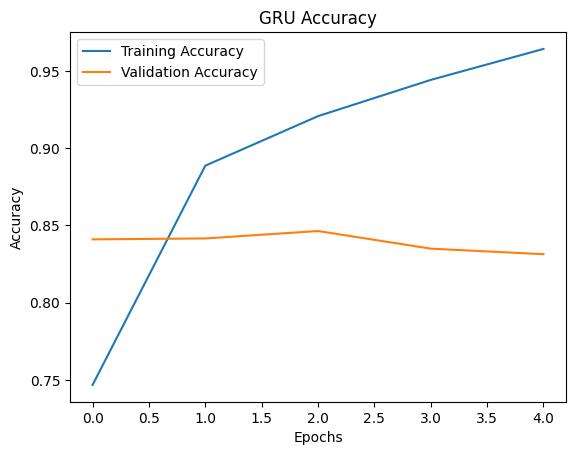

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Parameters
max_words = 10000  # Maximum number of words to consider as features
maxlen = 100       # Cut texts after this number of words (among top max_words most common words)

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Function to create an LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=maxlen))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to create a GRU model
def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=maxlen))
    model.add(GRU(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train the LSTM model
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test, verbose=0)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')

# Train the GRU model
gru_model = create_gru_model()
gru_history = gru_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the GRU model
gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test, verbose=0)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')

# Function to plot training history
def plot_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot training history for both models
plot_history(lstm_history, 'LSTM')
plot_history(gru_history, 'GRU')
